/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


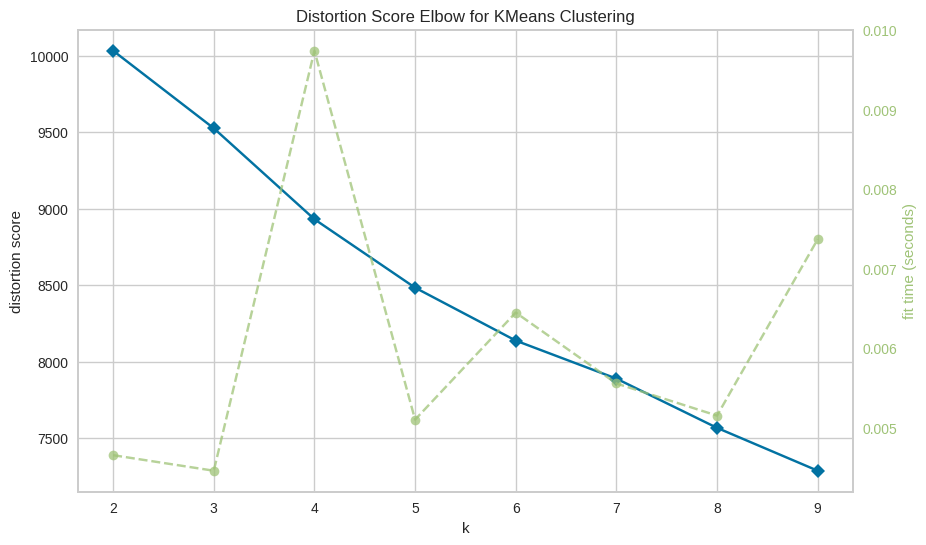

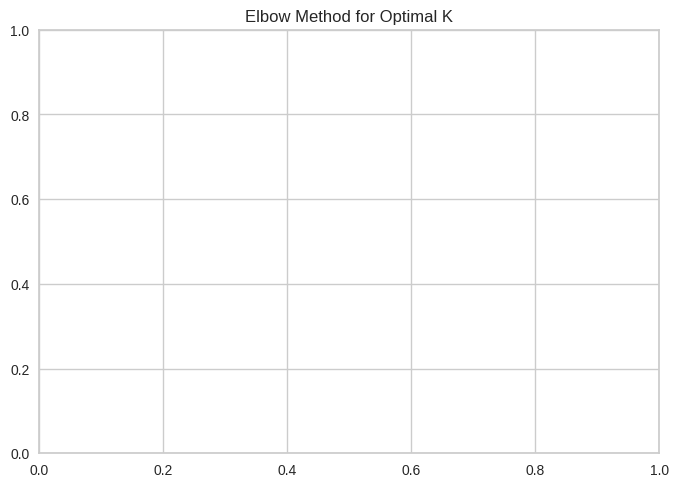

For k=2, silhouette score is 0.1003
For k=3, silhouette score is 0.0939
For k=4, silhouette score is 0.0865
For k=5, silhouette score is 0.0868
For k=6, silhouette score is 0.0902
For k=7, silhouette score is 0.0798
For k=8, silhouette score is 0.0751
For k=9, silhouette score is 0.0803


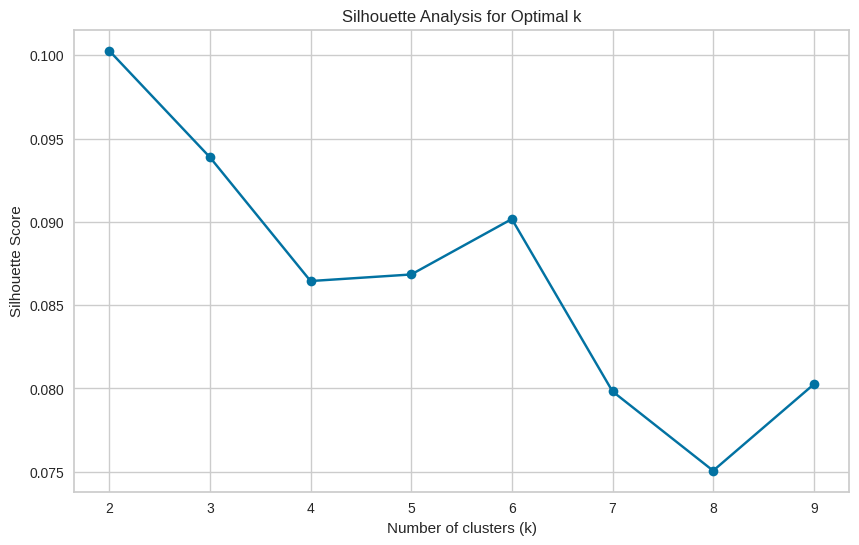

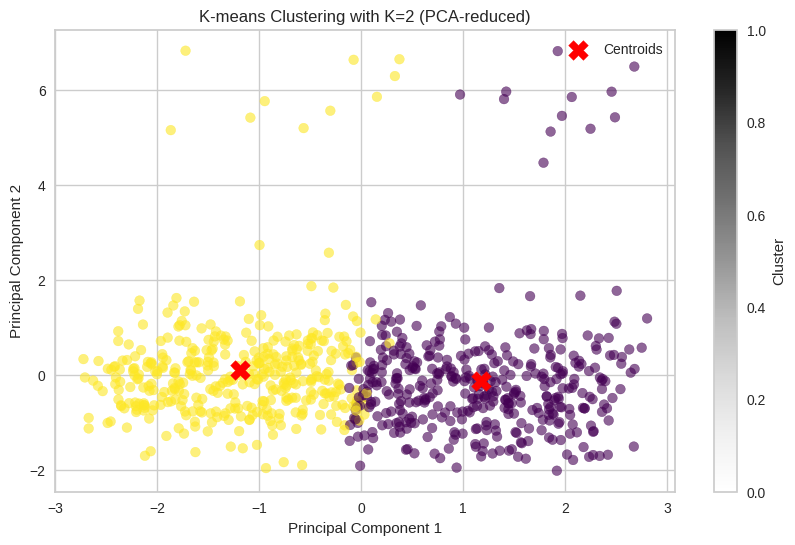

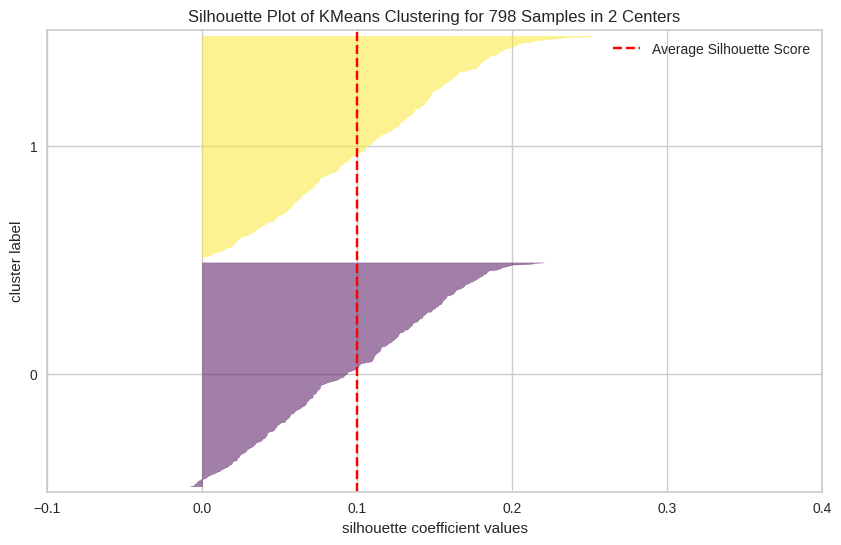

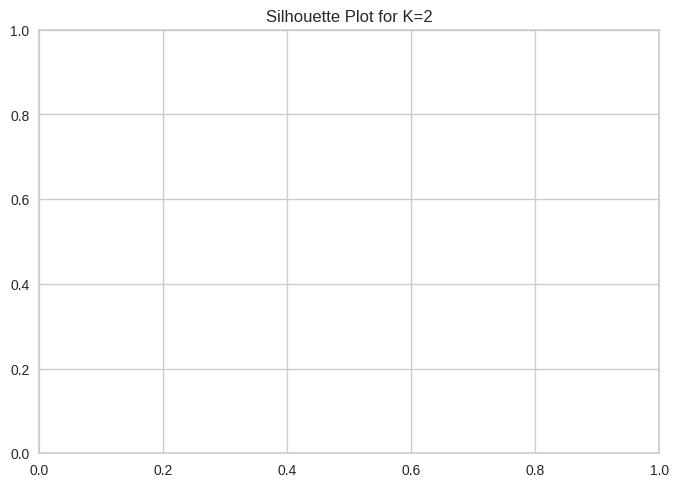

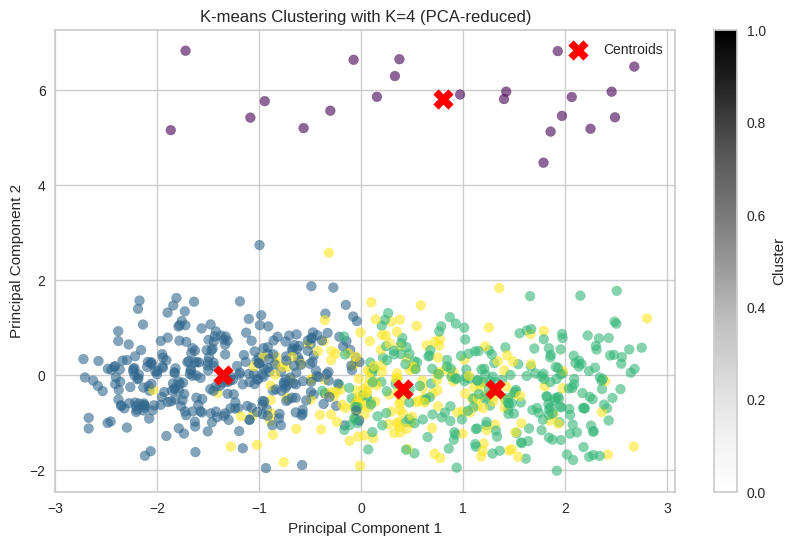

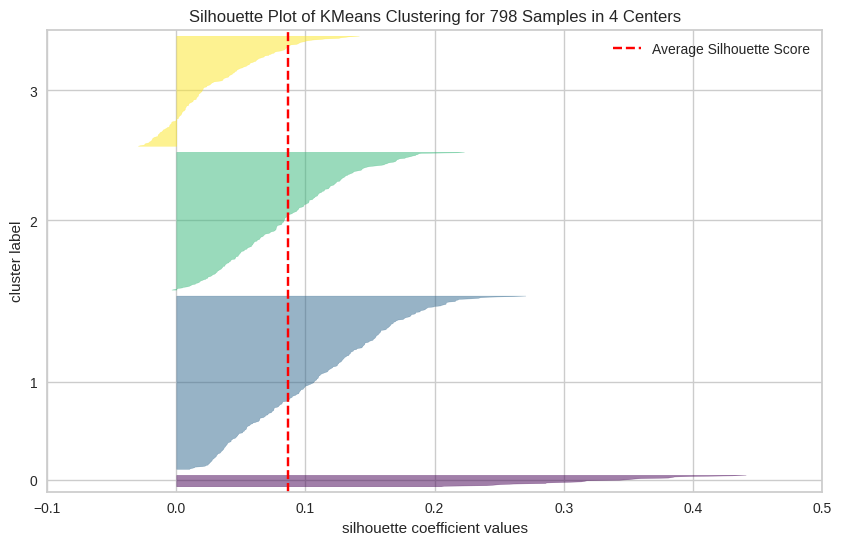

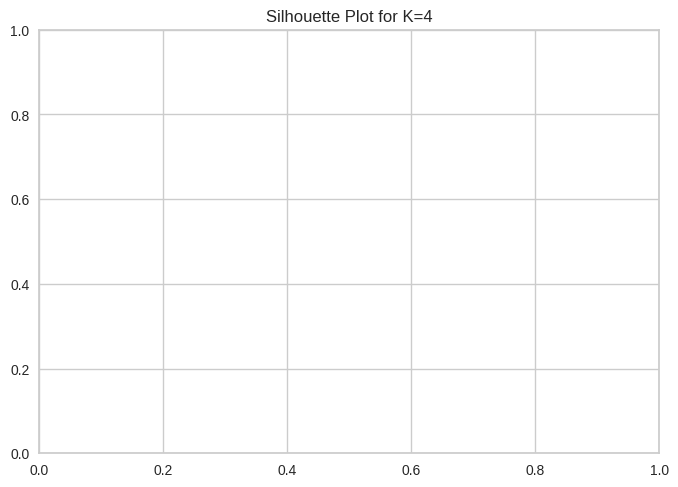

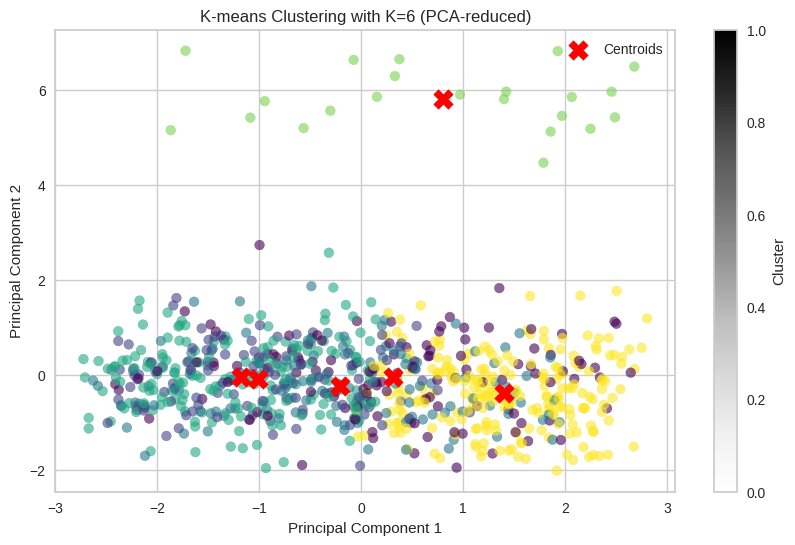

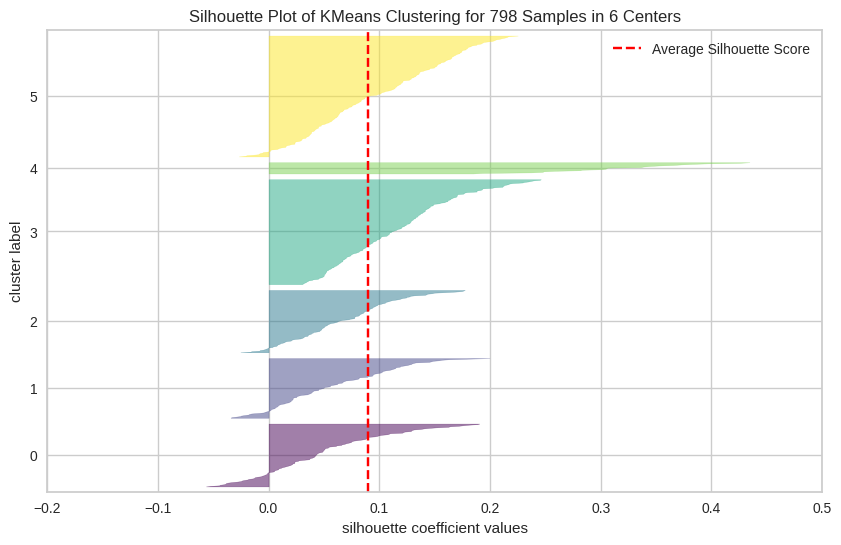

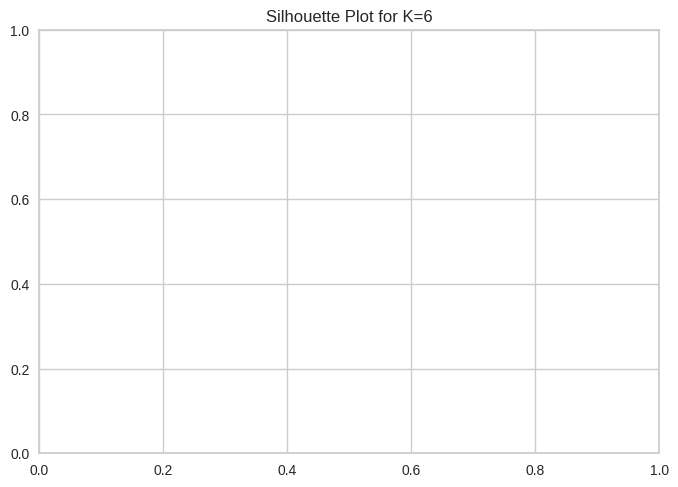


Comparison of K-means results:
K    Inertia        Silhouette Score    
2    10033.61       0.1003              
4    8931.66        0.0865              
6    8138.06        0.0902              

Cluster characteristics (mean values):
         Unnamed: 0   Weather  Road_Type  Time_of_Day  Traffic_Density  \
Cluster                                                                  
0        397.363636  1.909091   0.954545     1.727273         0.863696   
1        428.620690  1.507837   1.278997     1.043887         0.931084   
2        454.767717  1.515748   1.551181     1.244094         0.874073   
3        357.788177  0.990148   0.709360     1.793103         1.285812   

         Speed_Limit  Number_of_Vehicles  Driver_Alcohol  Road_Condition  \
Cluster                                                                    
0         197.318182           11.681818        0.189144        1.000000   
1          69.605024            3.156964        0.119317        0.968652   
2          65.8

<Figure size 1500x800 with 0 Axes>

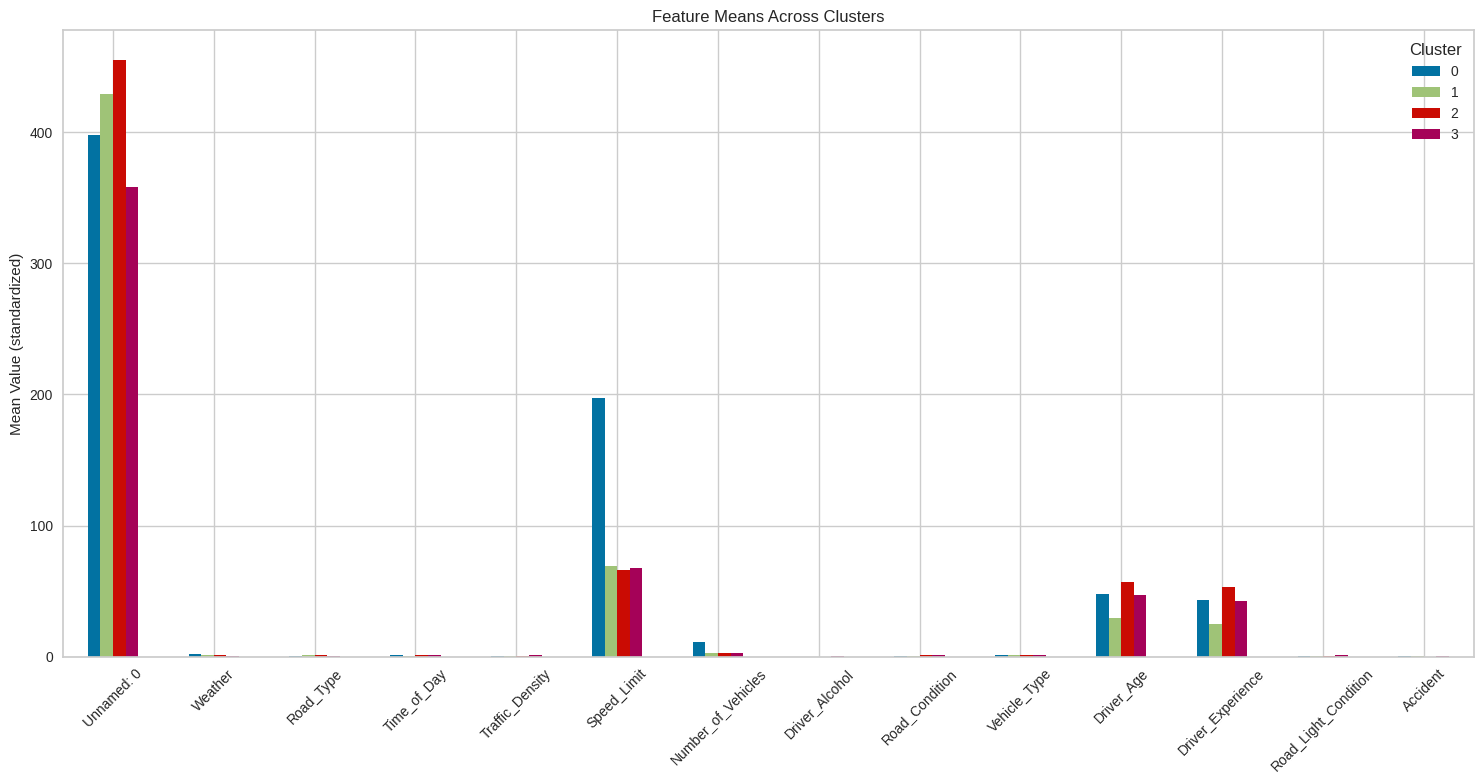

In [6]:
# K-means Clustering Analysis on Accident Dataset

# This analysis performs K-means clustering on the accident dataset using different values of K, evaluates the results, and visualizes the findings.
# The goal is to identify natural groupings in the accident data.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA

## **Step 1: Load the Dataset**
# Load the cleaned accident dataset
df = pd.read_csv('cleaned_data.csv')

## **Data Summary**
# We begin by exploring the dataset, providing key information such as the number of rows and columns, column names, data types, and the presence of missing values.
# To gain an initial understanding of the data, we display the first and last five rows of the dataset. Additionally, a boxplot based on the Accident_Severity column is generated to visualize the distribution of accident severity levels.
# Finally, we present a statistical summary of the dataset, including the mean, standard deviation, minimum, maximum values, and other key statistics to further understand the data distribution.

# Drop unnecessary columns
# Justification: The 'Accident_Severity' column is dropped as it is the target variable and not needed for clustering.
df = df.drop(columns=['Accident_Severity'])

## **Step 2: Handle Missing Values**
# Handle missing values
# Justification: Rows with missing values are removed to ensure that the clustering algorithm operates on complete data, preventing errors during model fitting and enhancing the quality of the results.
df = df.dropna()

## **Step 3: Data Standardization**
# Standardize the data
# Justification: Standardization is essential for K-means clustering as it ensures that all features contribute equally to the distance calculations. This prevents features with larger scales from dominating the clustering process.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

## **Step 4: Determine Optimal K using Elbow Method**
# Elbow Method Visualization
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()
plt.title('Elbow Method for Optimal K')
plt.show()

# Justification: The Elbow Method helps identify the optimal number of clusters (K) by plotting the inertia against K values. The "elbow" point indicates where adding more clusters yields diminishing returns.

## **Step 5: Silhouette Score Analysis**
# Calculate silhouette scores for K values from 2 to 9
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"For k={k}, silhouette score is {score:.4f}")

# Silhouette Score Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)
plt.show()

# Justification: The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters, aiding in the validation of the chosen K.

## **Step 6: Perform K-means with Selected K Values**
# Based on the analysis, we select K values: 2, 4, and 6
k_values = [2, 4, 6]
results = {}

for k in k_values:
    # Create and fit K-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)

    # Store results
    results[k] = {
        'model': kmeans,
        'labels': kmeans.labels_,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_score(scaled_data, kmeans.labels_)
    }

    ## **Step 7: Visualize Clusters using PCA**
    # Reduce dimensions for visualization
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_data)

    plt.figure(figsize=(10, 6))
    plt.scatter(principal_components[:, 0], principal_components[:, 1],
                c=kmeans.labels_, cmap='viridis', alpha=0.6)
    plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
                pca.transform(kmeans.cluster_centers_)[:, 1],
                marker='X', s=200, c='red', label='Centroids')
    plt.title(f'K-means Clustering with K={k} (PCA-reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.colorbar(label='Cluster')
    plt.show()

    ## **Step 8: Silhouette Visualization for Each K**
    plt.figure(figsize=(10, 6))
    visualizer = SilhouetteVisualizer(kmeans, colors='viridis')
    visualizer.fit(scaled_data)
    visualizer.show()
    plt.title(f'Silhouette Plot for K={k}')
    plt.show()

## **Step 9: Compare Results**
print("\nComparison of K-means results:")
print(f"{'K':<5}{'Inertia':<15}{'Silhouette Score':<20}")
for k in k_values:
    print(f"{k:<5}{results[k]['inertia']:<15.2f}{results[k]['silhouette']:<20.4f}")

# Justification: Comparing inertia and silhouette scores allows for the evaluation of clustering performance across different K values.
# This comparison aids in making an informed decision regarding the optimal number of clusters.

## **Step 10: Analyze Cluster Characteristics for the Best K**
# Assume K=4 is the best based on silhouette analysis
best_k = 4
kmeans = results[best_k]['model']
df['Cluster'] = kmeans.labels_

# Analyze cluster characteristics
# We group the dataset by the assigned clusters and calculate the mean values of each feature within each cluster.
cluster_stats = df.groupby('Cluster').mean()
print("\nCluster characteristics (mean values):")
print(cluster_stats)

# Visualize cluster characteristics
plt.figure(figsize=(15, 8))
cluster_stats.T.plot(kind='bar', figsize=(15, 8))
plt.title('Feature Means Across Clusters')
plt.ylabel('Mean Value (standardized)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Justification: Analyzing and visualizing cluster characteristics helps interpret the meaning of each cluster, revealing insights into accident patterns.
# This analysis can inform targeted safety interventions based on the identified characteristics of each cluster.